# NGC 6121  (M 4) Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
import optical
%matplotlib inline 

In [2]:
target = 'NGC6121'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '16:23:35.22'
cluster_dec = '-26:31:32.7'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

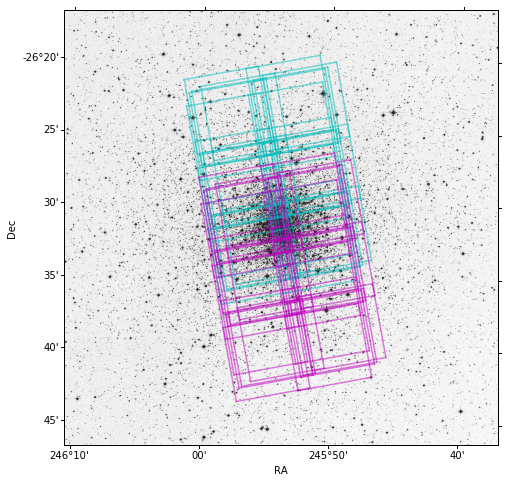

In [4]:
from matplotlib.colors import LogNorm
from astropy.io import fits
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC6121...
Finished reading optical catalog.


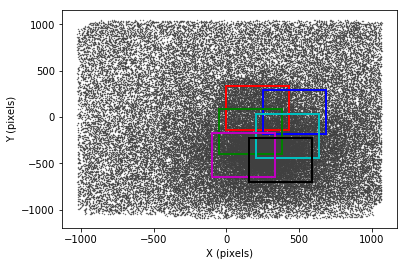

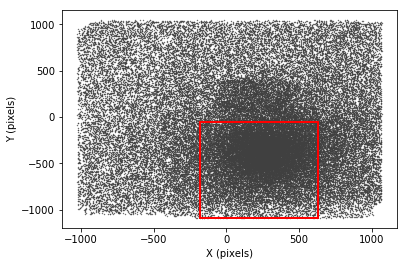

In [5]:
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)

dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(cuts['xmin'])):
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymax'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmin'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmax'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()

## Mosaics
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I2-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r']
ind=0
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()

#### Check transformed catalogs

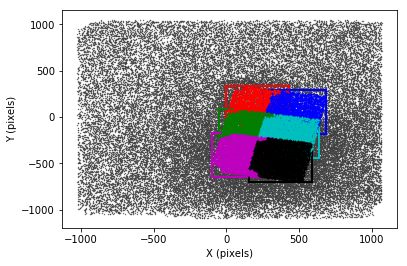

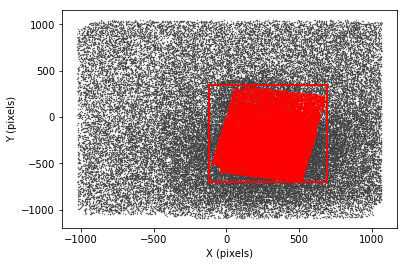

In [6]:
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(cuts['xmin'])):
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymax'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmin'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmax'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
for ind in range(len(cuts['xmin'])):
    IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_field'+str(ind+1)+'.mag')
    files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-f'+str(ind+1)+'.mch')
    x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
    y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
    mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

## Mosaics
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r']
ind=0
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_mosaic.mag')
files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-mosaics.mch')
x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

# Calibration

In [5]:
import calibration

In [4]:
calibration.find_stars_in_cat(optical_dir, target, 'I1', data_dir=folder)
calibration.find_stars_in_cat(optical_dir, target, 'I2', data_dir=folder)

Reading optical catalog for NGC6121...
Finished reading optical catalog.
Writing files...
Reading optical catalog for NGC6121...
Finished reading optical catalog.
Writing files...


### Go to IDL and run aperture photometry script before the following steps

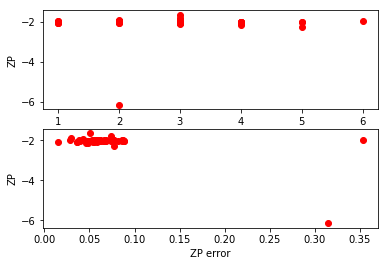

Maximum number of neighbors?: 5
Maximum standard deviation?:0.07
39 final calibration stars.
Mean, median zero point and standard deviation:
-2.02213080674 -2.02631666667 0.032831252844


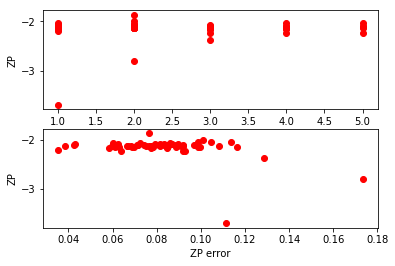

Maximum number of neighbors?: 4
Maximum standard deviation?:0.08
19 final calibration stars.
Mean, median zero point and standard deviation:
-2.12489471162 -2.12477142857 0.0173619909813


In [5]:
calibration.find_zp('I1', verbose=0, data_dir=folder)
calibration.find_zp('I2', verbose=0, data_dir=folder)

In [6]:
calibration.apply_calibration('I1', -2.02, data_dir=folder)
calibration.apply_calibration('I2', -2.11, data_dir=folder)

# Period Search

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

In [6]:
import lightcurves

### Read in variables from Clement catalog

In [11]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=1, returnColors=True)



Datasets:

    danish 290533 2001-04-14 2001-07-01 k
     Y1007  12893 2010-08-03 2010-08-04 r
      manu   7479 2000-06-07 2000-06-09 b
      wfi5   3136 2002-06-18 2002-06-21 g
     emmi8   2517 2007-07-13 2007-07-16 m
     bond5   1007 1997-06-02 1997-06-02 c
      wfi6    968 2002-02-21 2002-02-21 xkcd:brown
     bond7    564 2001-03-28 2001-03-28 xkcd:coral
     wfi10    393 2000-07-08 2000-07-08 xkcd:purple
    not017    352 2001-07-10 2001-07-10 xkcd:maroon
 fors20605    219 2006-05-29 2006-05-30 xkcd:olive
     apr97    104 1997-04-14 1997-04-14 xkcd:tan
       pwm     29 1994-04-27 1994-04-27 xkcd:grey


V1 0.2888826


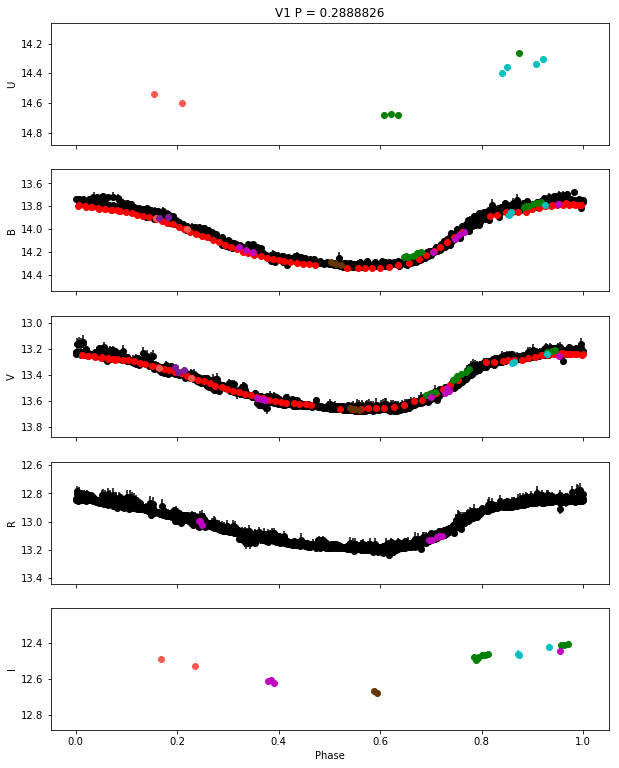

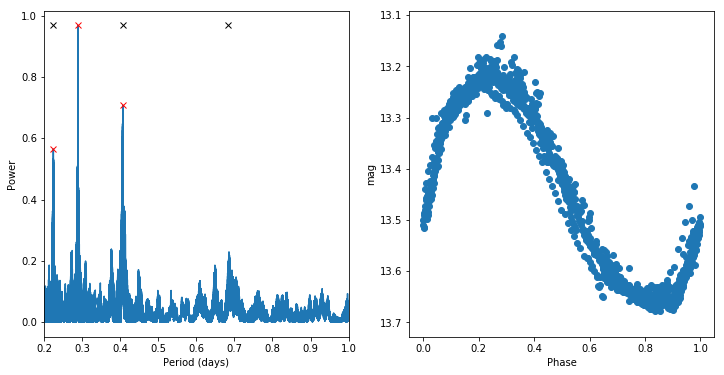

0.288883771257


In [17]:
### For single star
ind=0
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=1)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)

# broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V1 0.2888826 0.288882571257


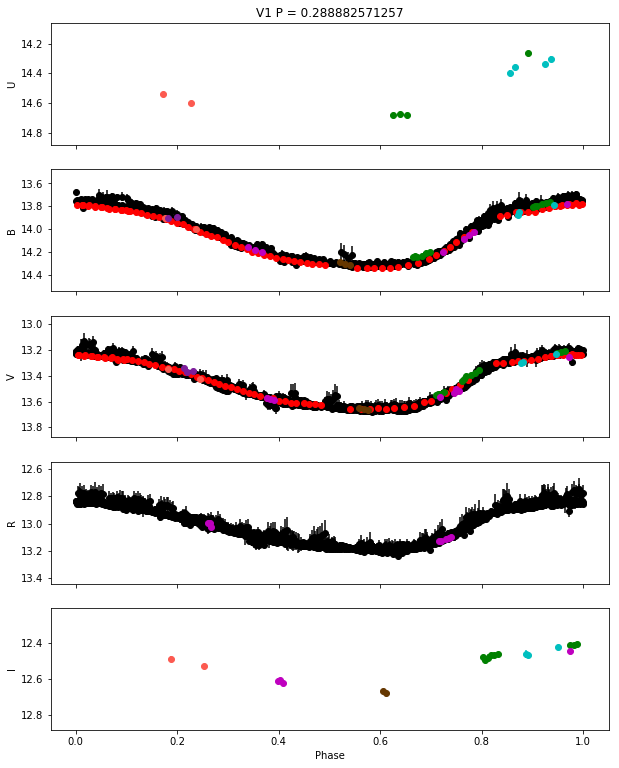

In [18]:
period = lightcurves.period_search(V, new_guess, lcv, second_band=B, search_window=0.00005)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)

# Search for other variable candidates

In [ ]:
cluster_ra = '21:29:58.33'
cluster_dec = '12:10:01.2'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)

In [ ]:
optical.find_variables_fnl(optical_folder, target, center_ra, center_dec, folder=folder)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_folder, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

datasets = optical.compile_datasets(folder, old=0, returnColors=False)


In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 16.2
HB_upper = 15.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.7
GB_lower = 17
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

In [ ]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)

##  Generate MIR light curves matching optical ID numbers  

In [19]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

In [20]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

V30 not found.
V31 not found.
V32 not found.
V33 not found.
V34 not found.
V35 not found.
V43 not found.
V64 not found.
V75 not found.
V76 not found.


#### Create figure with all bands phased together

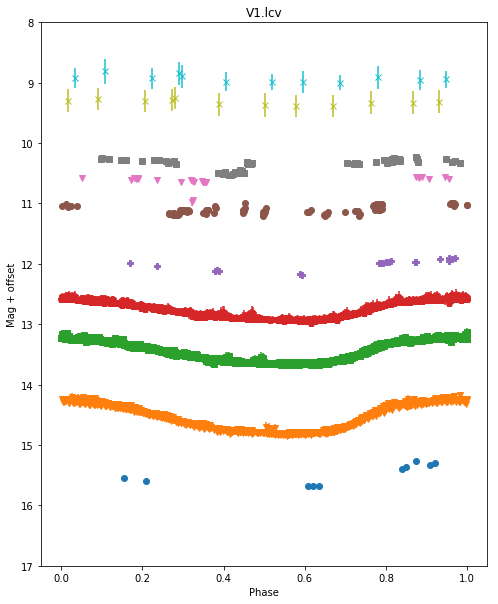

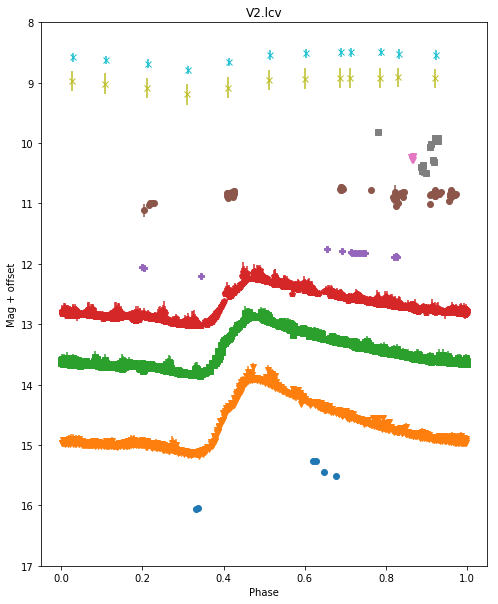

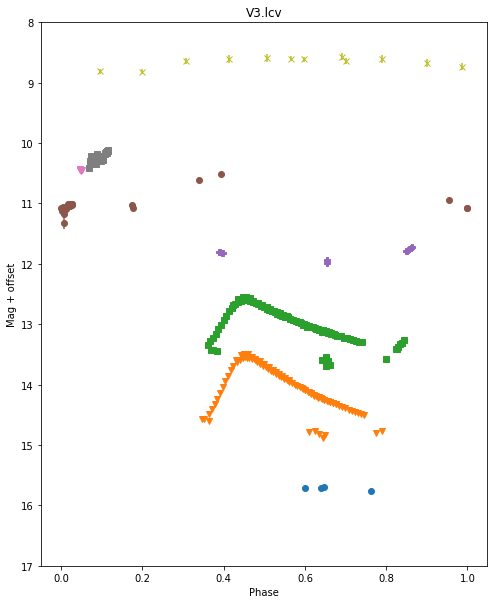

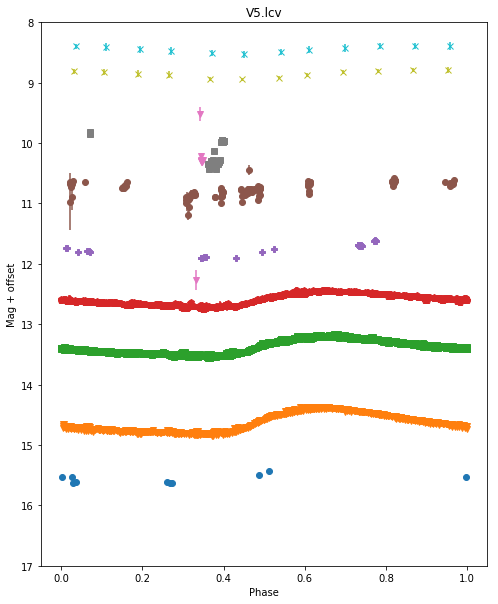

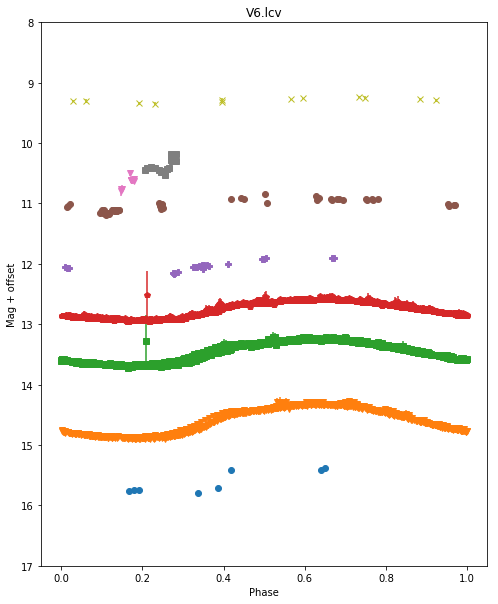

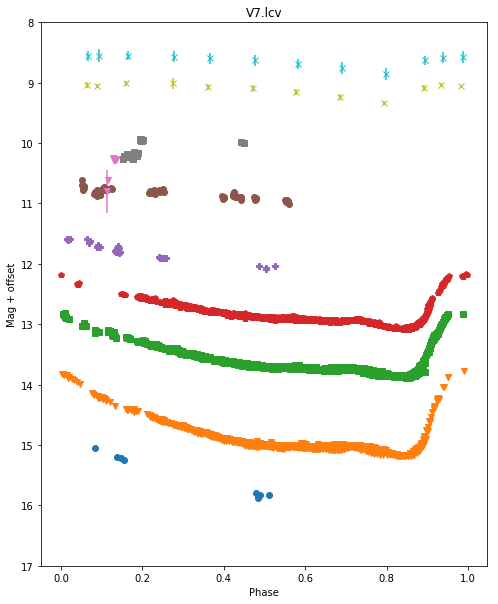

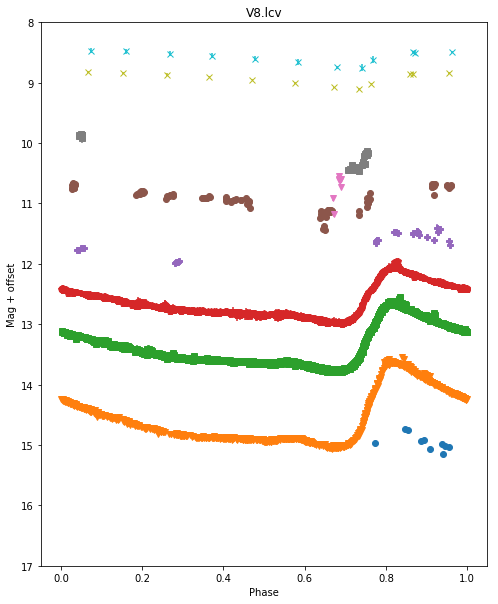

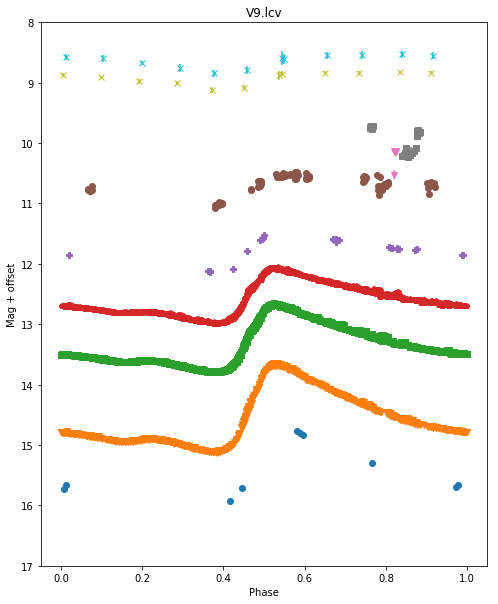

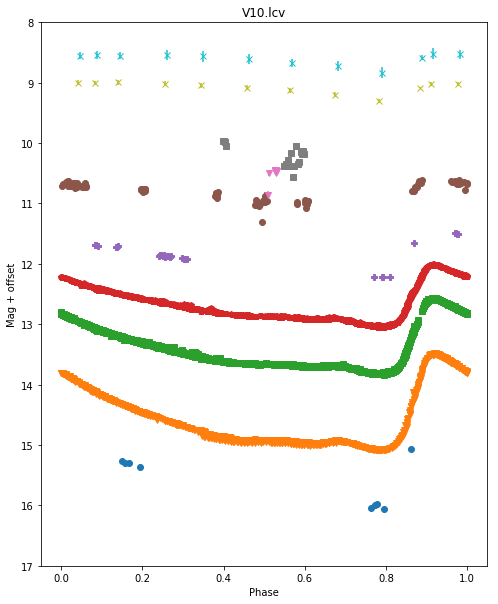

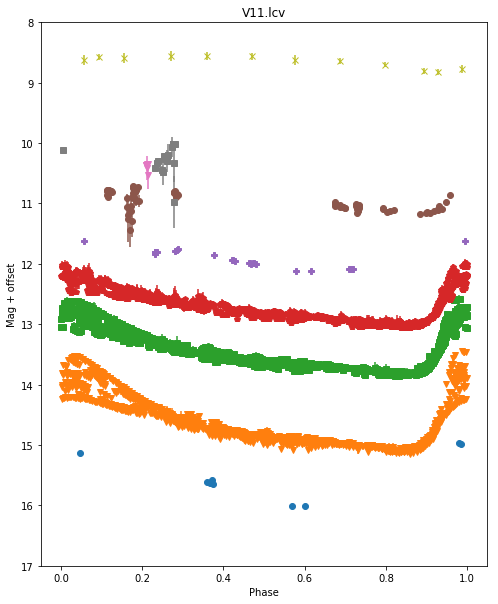

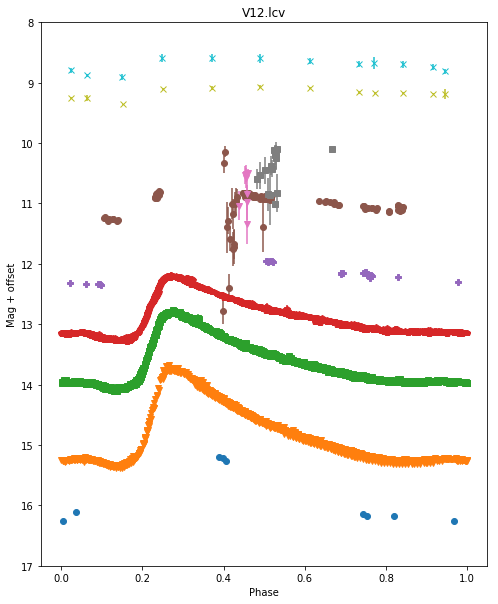

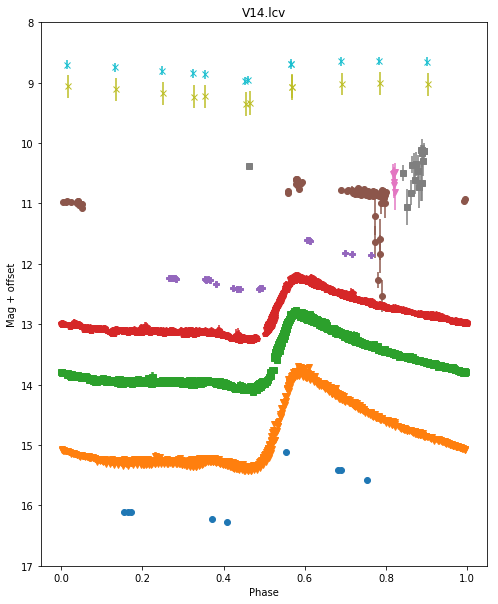

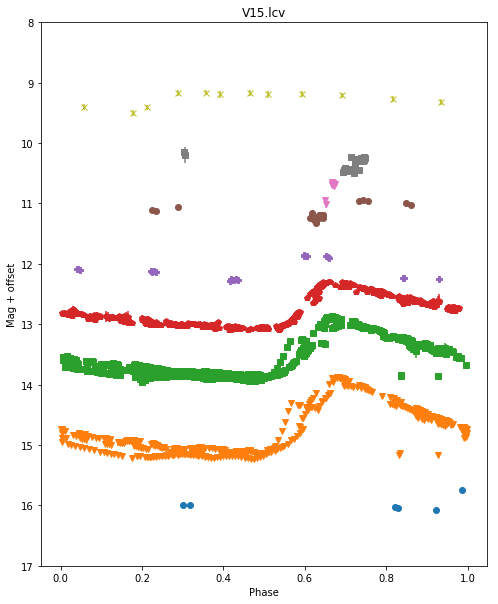

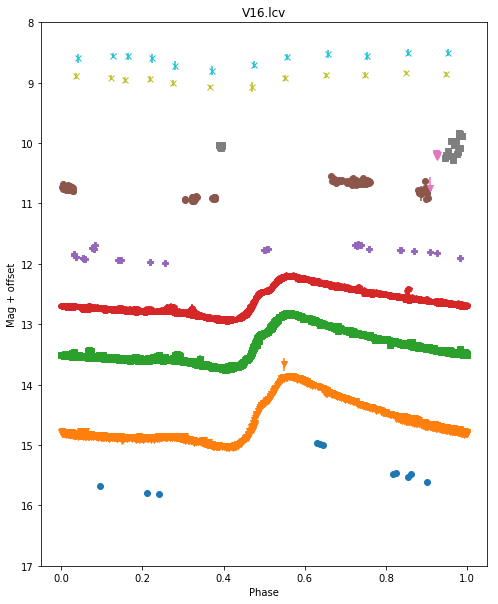

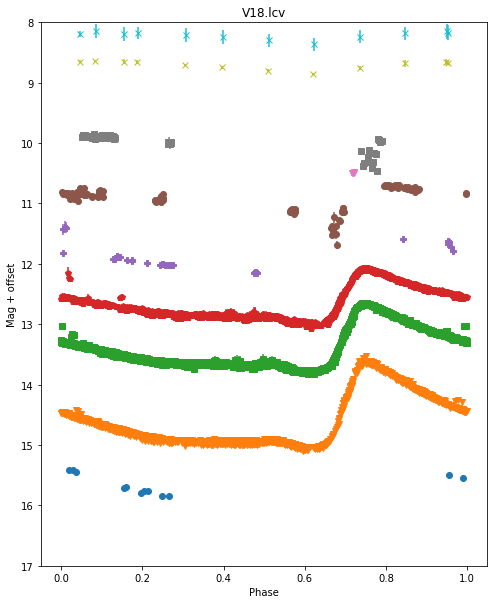

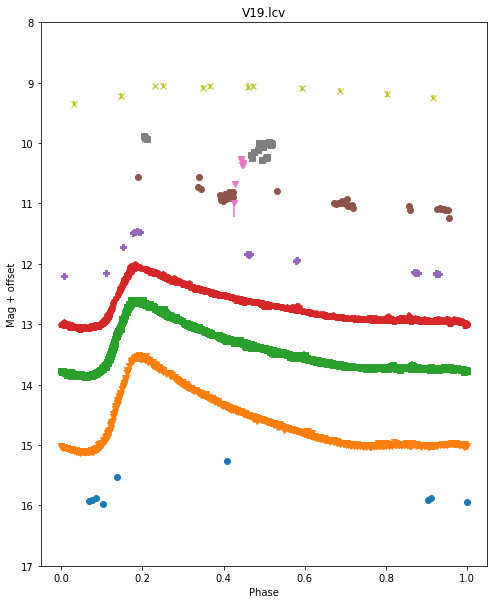

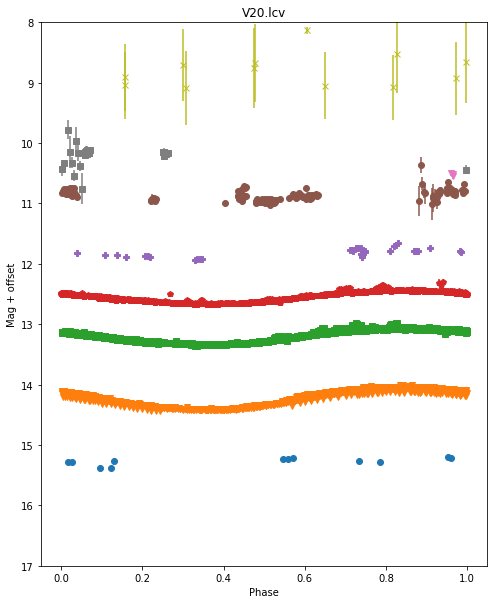

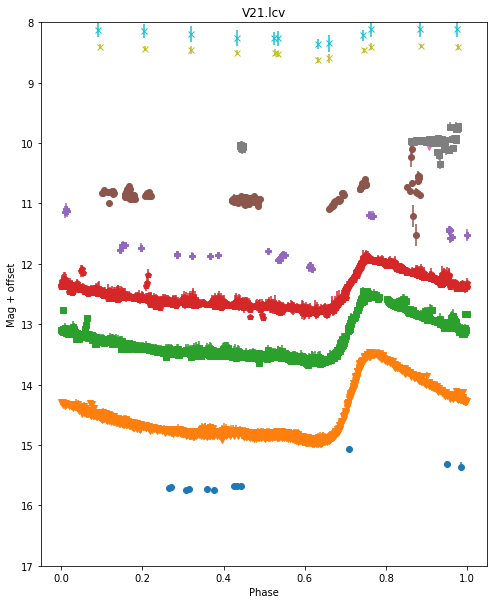

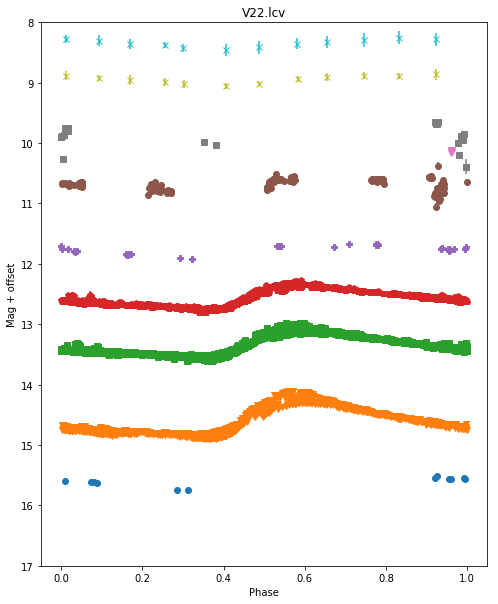

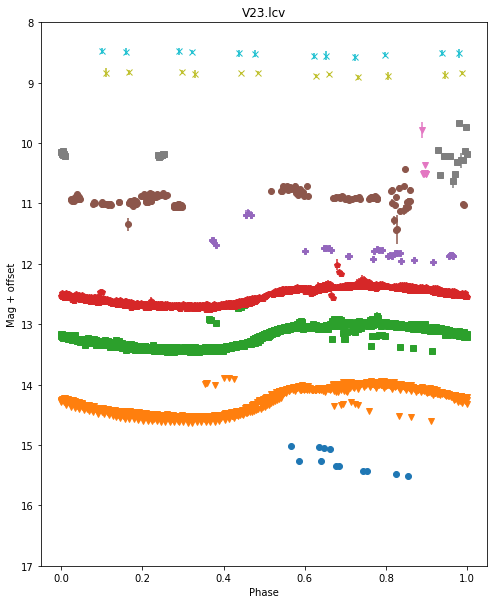

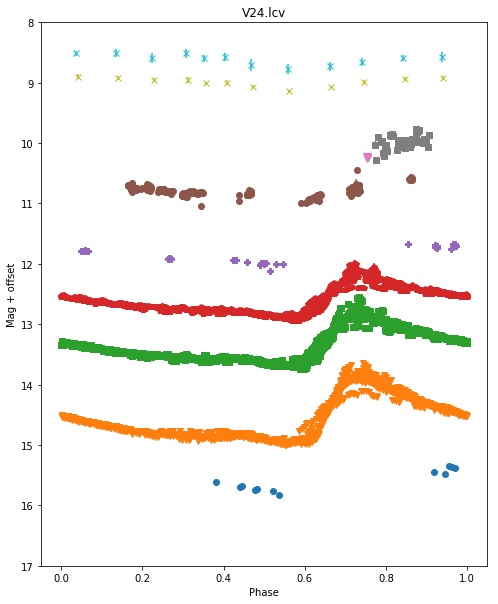

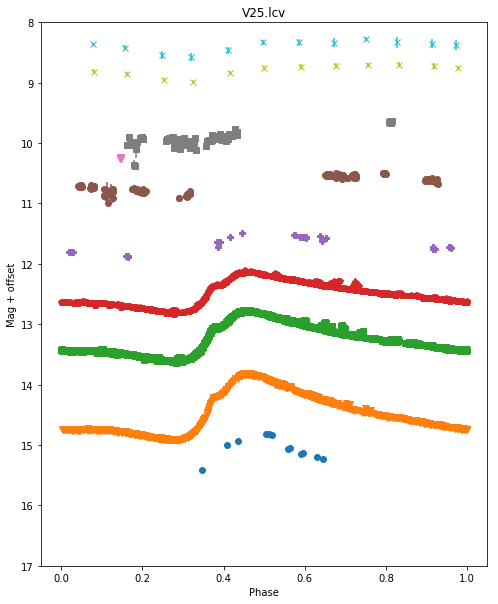

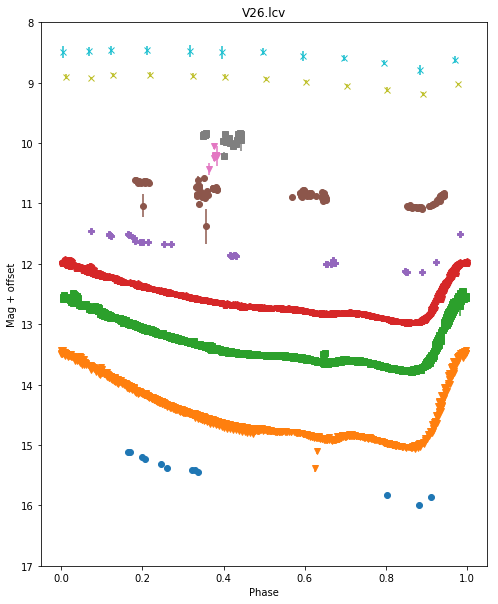

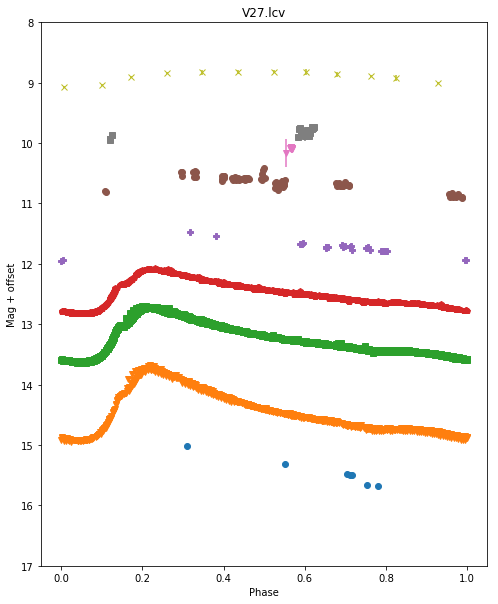

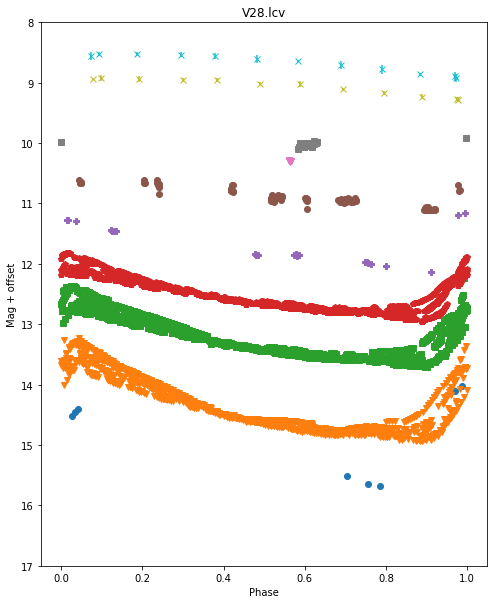

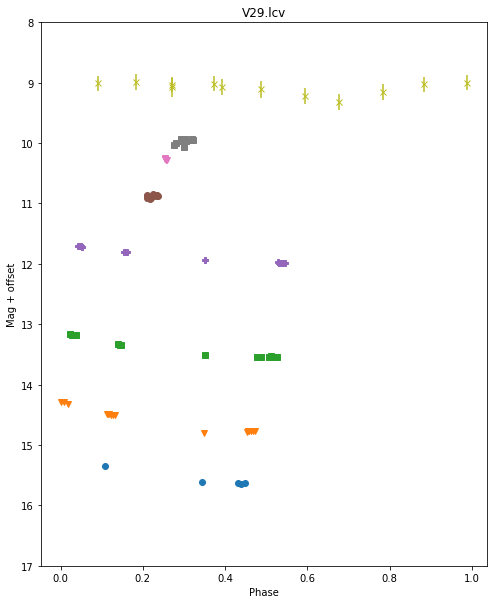

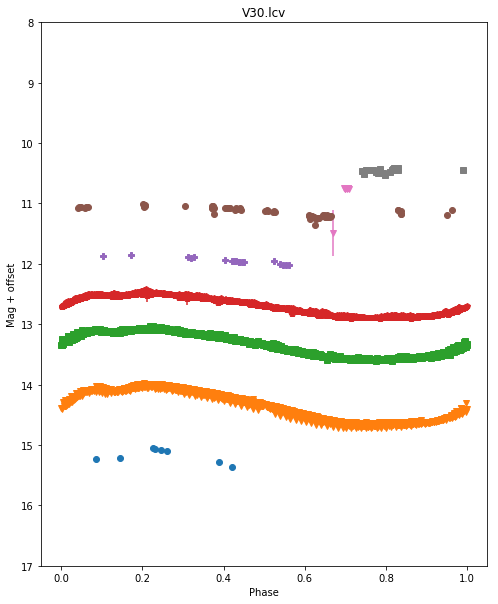

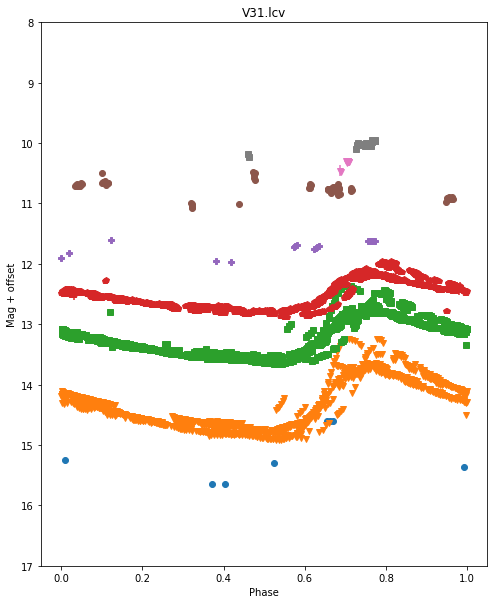

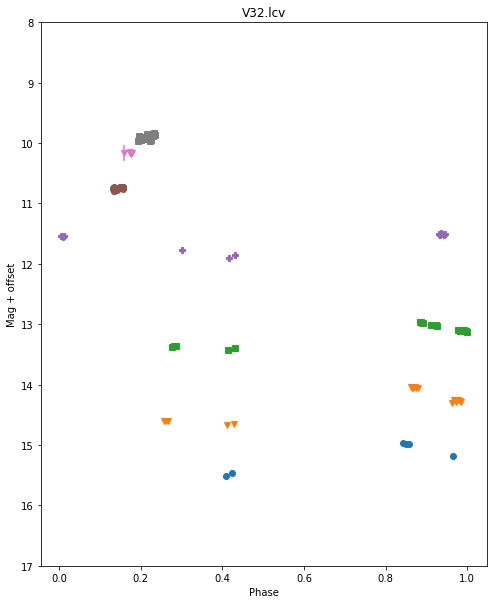

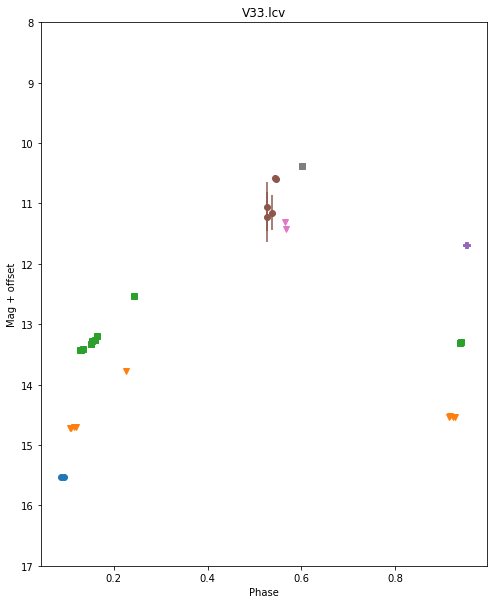

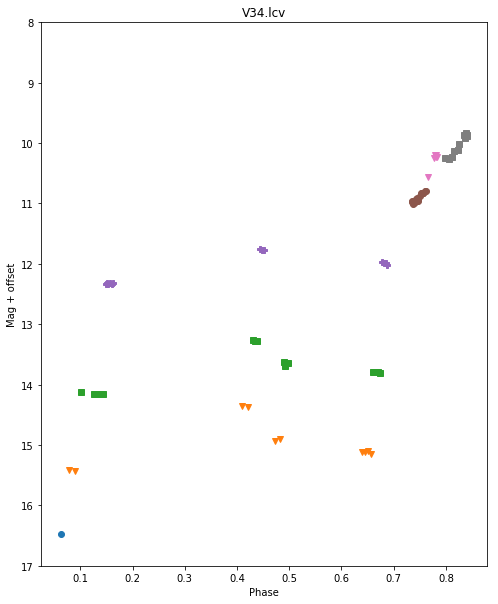

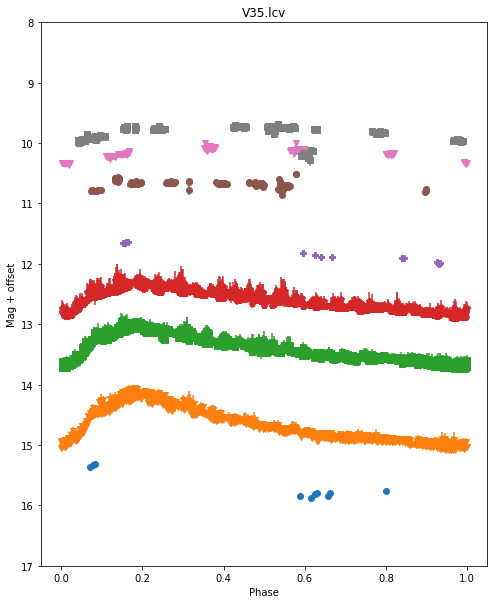

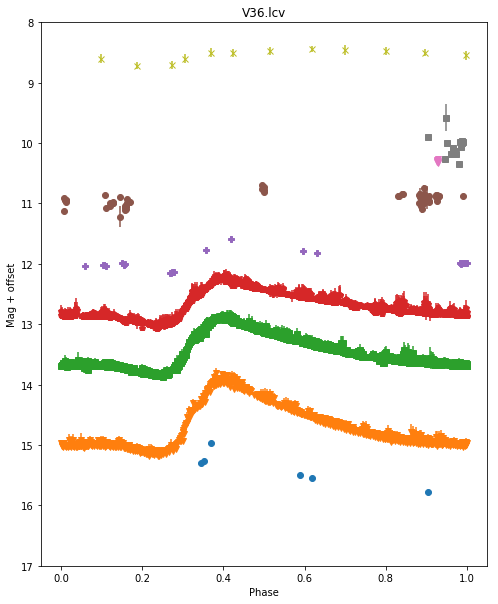

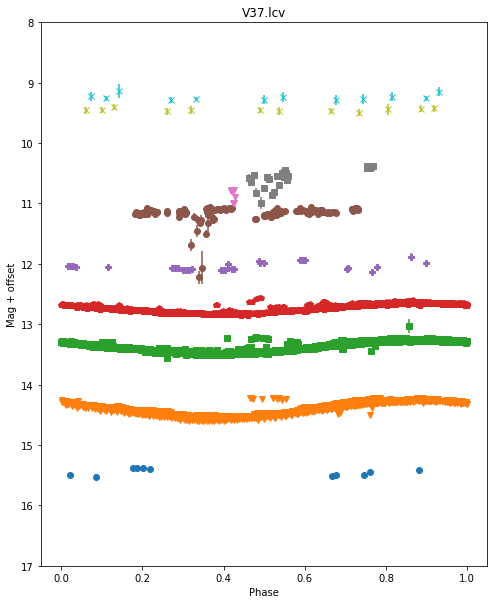

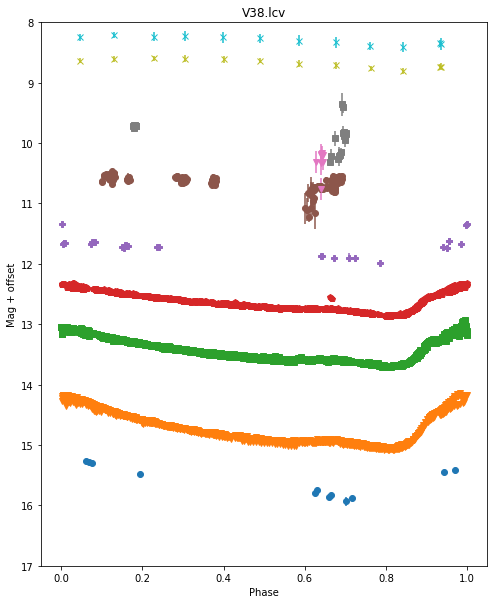

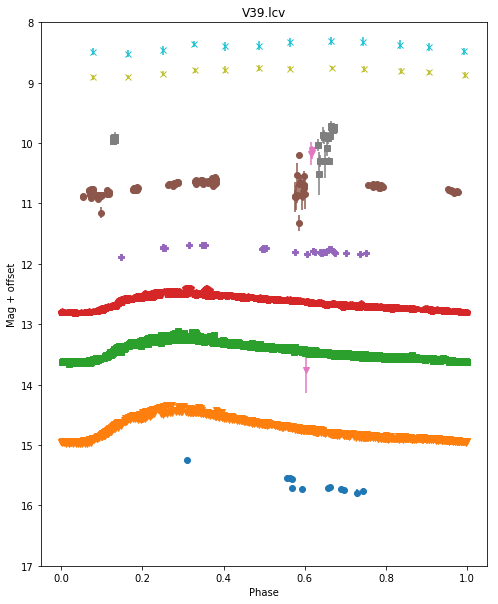

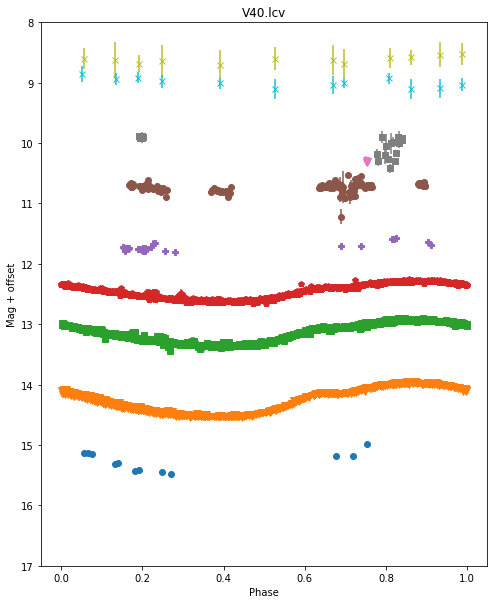

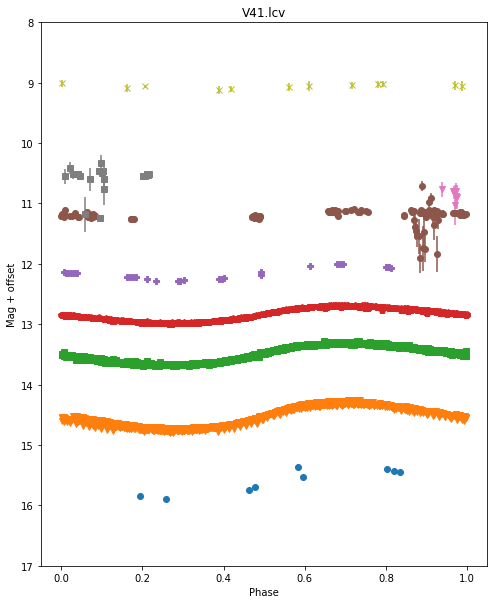

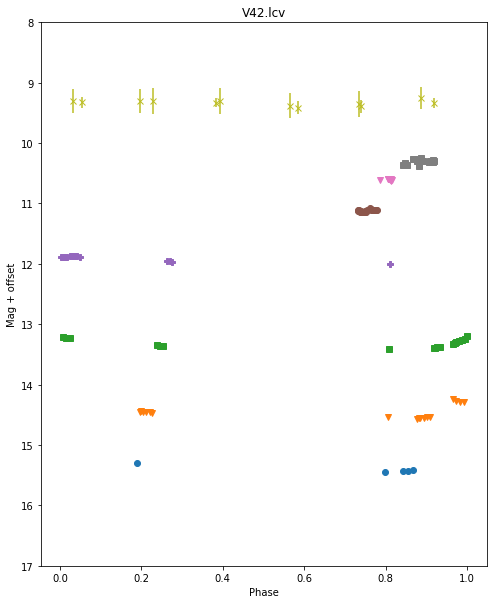

V43  not found.


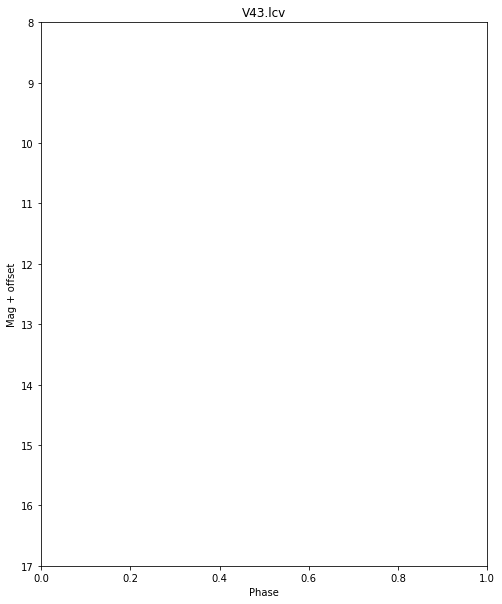

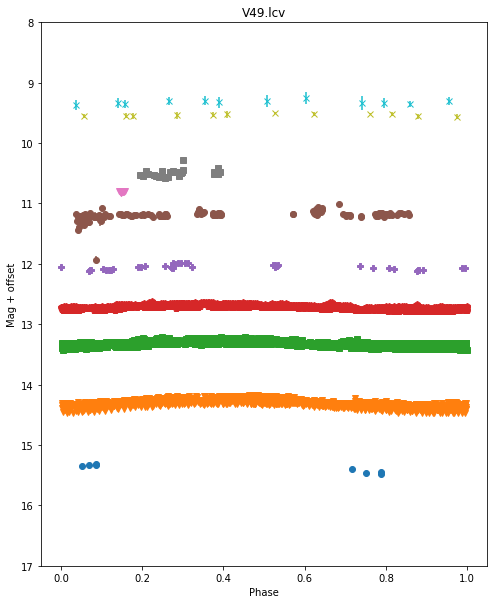

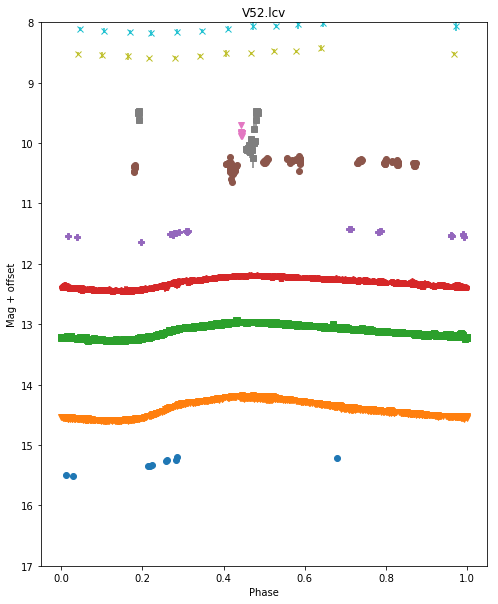

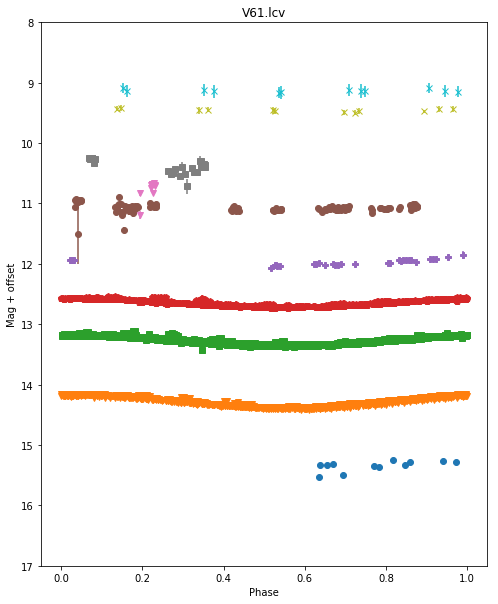

V64  not found.


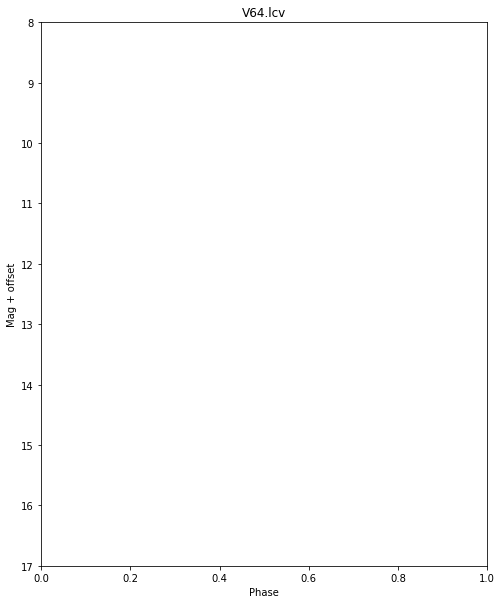

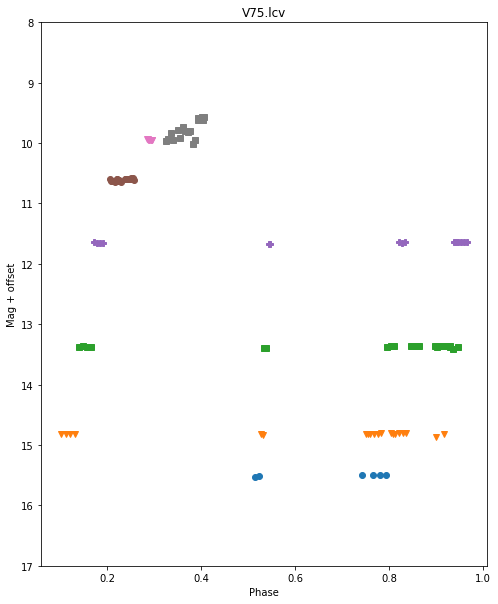

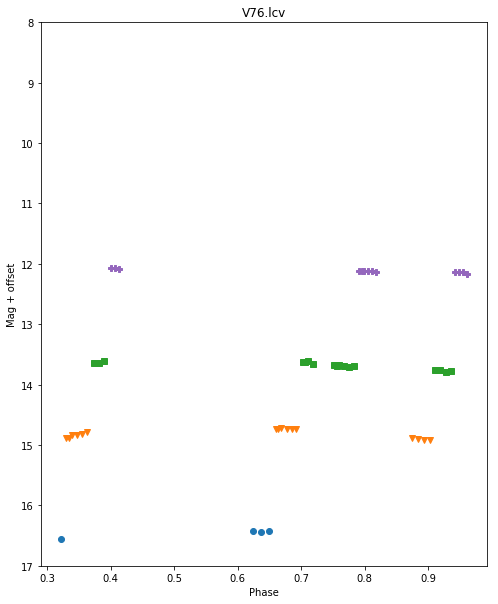

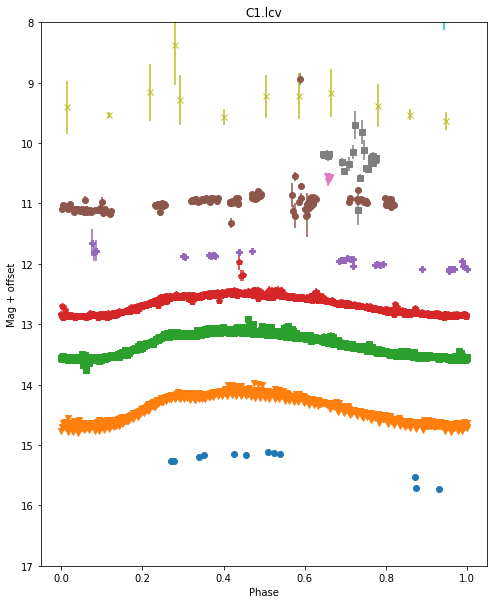

In [9]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
#ind = 0
#star = data['id'][ind]
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder, old=1)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder, old=1)
    except:
        print star, ' not found.'
        continue

## Fit light curves

In [ ]:
f = open(folder+'avg_mags.txt', 'a')
star = data['id'][28]
#for ind, star in enumerate(stars):
    
r1, r2, r3, r4 = lightcurves.gloess(folder+'lcvs/'+star+'.phased', plot_save=1, clean=1)
datasave = np.array(zip(np.repeat(star, len(r1)), r1, np.repeat(data['new_period'][ind], len(r1)), r2, r3, r4), dtype=[('c1', 'S3'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float)])
np.savetxt(f, datasave, fmt='%3s %2s %10.8f %6.3f %4.2f %4.2f')
    
f.close()